In [12]:
#IMPORT THE LIBRARIES
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix,classification_report
# Imports pour le modèle et le prétraitement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import librosa
import librosa.display
import IPython.display as ipd
import multiprocessing as mp
import timeit
from tqdm import tqdm
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
import tensorflow.keras.layers as L
from keras.callbacks import EarlyStopping 
from tensorflow.keras.models import Sequential, model_from_json 
from tensorflow.keras.models import Sequential, model_from_json

In [13]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import tensorflow as tf 
print("Done")

Done


In [14]:
#!apt-get update
#!apt-get install -y libsndfile1

In [15]:
#!pipreqsnb --savepath /kaggle/working/requirements.txt

# Importing Data

In [16]:
ravdess = 'Dataset_RAVDESS'
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_song_actors_01-24']


In [17]:
len(ravdess_directory_list)

24

# preprocessing

In [18]:
file_emotion = []  # List to store emotions extracted from the audio files
file_path = []     # List to store the full paths of the audio files

for i in ravdess_directory_list:  # Iterate through each item in the directory list
    # Add a slash between 'ravdess' and 'i' to construct the correct path
    actor_dir = os.path.join(ravdess, i)
    
    # Check that the path is a directory
    if os.path.isdir(actor_dir):
        # Extract files for each actor
        actor = os.listdir(actor_dir)
        
        for f in actor:  # Iterate through each file of the actor
            part = f.split('.')[0].split('-')  # Split the filename
            
            # Check that there are at least three elements in `part`
            if len(part) > 2:
                # The third part represents the associated emotion
                file_emotion.append(int(part[2]))  # Add the emotion to the list
                file_path.append(os.path.join(actor_dir, f))  # Add the full file path
            else:
                print(f"Warning: the file '{f}' does not follow the expected format.")


In [19]:
print(actor[0])
print(part[0])
print(file_path[0])
print(f)

Actor_01
Actor_24
Dataset_RAVDESS\Actor_01\03-02-01-01-01-01-01.wav
Actor_24


In [20]:
if len(part) > 2:  
    print(int(part[2]))  
else:  
    print("Error: 'part' list has fewer than 3 elements.") 

Error: 'part' list has fewer than 3 elements.


In [21]:
print(actor[0])  
print(part[0])  
print(file_path[0])  

if len(part) > 2:  
    print(int(part[2]))  
else:  
    print("Error: 'part' list has fewer than 3 elements.")  

print(f) 

Actor_01
Actor_24
Dataset_RAVDESS\Actor_01\03-02-01-01-01-01-01.wav
Error: 'part' list has fewer than 3 elements.
Actor_24


In [22]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  Dataset_RAVDESS\Actor_01\03-02-01-01-01-01-01.wav
1  neutral  Dataset_RAVDESS\Actor_01\03-02-01-01-01-02-01.wav
2  neutral  Dataset_RAVDESS\Actor_01\03-02-01-01-02-01-01.wav
3  neutral  Dataset_RAVDESS\Actor_01\03-02-01-01-02-02-01.wav
4  neutral  Dataset_RAVDESS\Actor_01\03-02-02-01-01-01-01.wav
______________________________________________
     Emotions                                               Path
1007     fear  Dataset_RAVDESS\Actor_24\03-02-06-01-02-02-24.wav
1008     fear  Dataset_RAVDESS\Actor_24\03-02-06-02-01-01-24.wav
1009     fear  Dataset_RAVDESS\Actor_24\03-02-06-02-01-02-24.wav
1010     fear  Dataset_RAVDESS\Actor_24\03-02-06-02-02-01-24.wav
1011     fear  Dataset_RAVDESS\Actor_24\03-02-06-02-02-02-24.wav
_______________________________________________
Emotions
neutral    276
happy      184
sad        184
angry      184
fear       184
Name: count, dtype: int64


# Integration

In [23]:
data_path = ravdess_df
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,Dataset_RAVDESS\Actor_01\03-02-01-01-01-01-01.wav
1,neutral,Dataset_RAVDESS\Actor_01\03-02-01-01-01-02-01.wav
2,neutral,Dataset_RAVDESS\Actor_01\03-02-01-01-02-01-01.wav
3,neutral,Dataset_RAVDESS\Actor_01\03-02-01-01-02-02-01.wav
4,neutral,Dataset_RAVDESS\Actor_01\03-02-02-01-01-01-01.wav


In [24]:
print(data_path.Emotions.value_counts())

Emotions
neutral    276
happy      184
sad        184
angry      184
fear       184
Name: count, dtype: int64


## Data Visualisation and Exploration

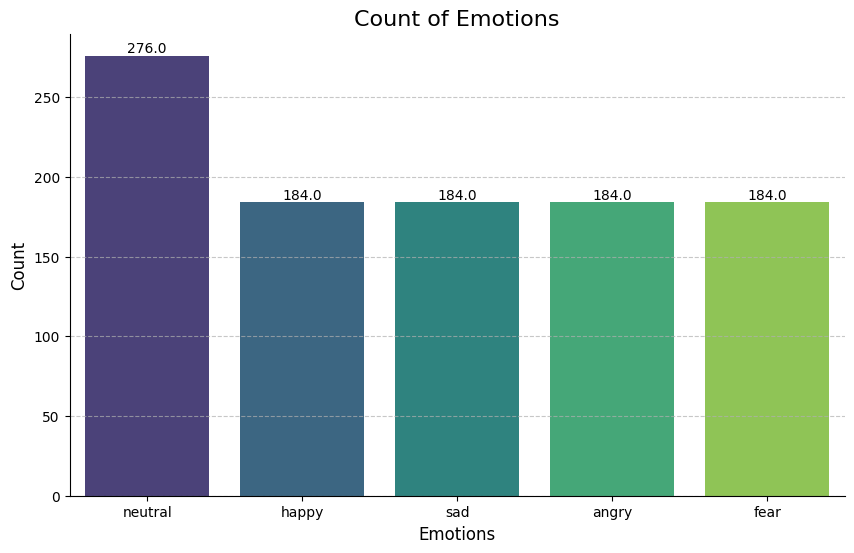

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(data=data_path, x='Emotions', palette='viridis')


plt.title('Count of Emotions', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)


for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)


sns.despine(top=True, right=True, left=False, bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
data,sr = librosa.load(file_path[0])
sr

22050

In [28]:
ipd.Audio(data,rate=sr)

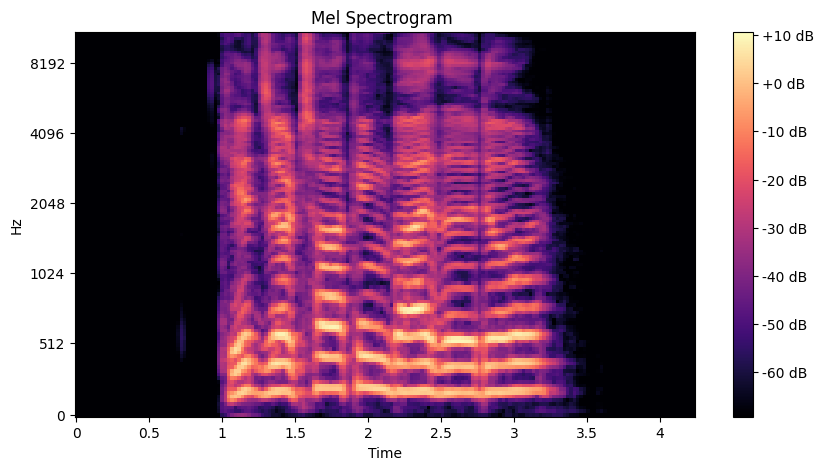

In [29]:
# Create Log mel spectrogram
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

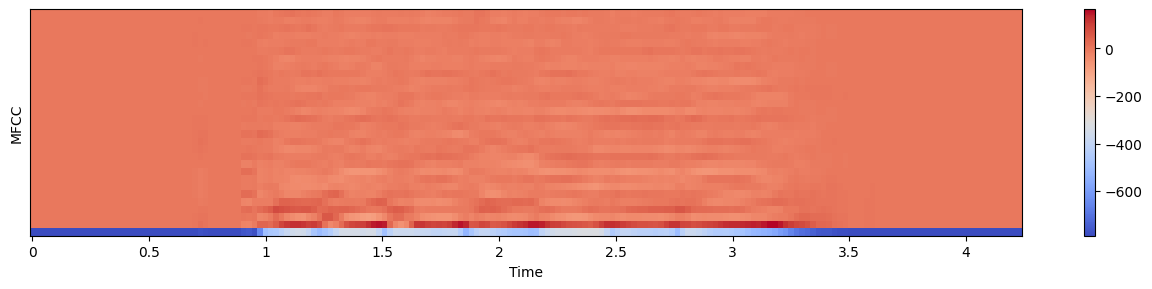

In [30]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [31]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

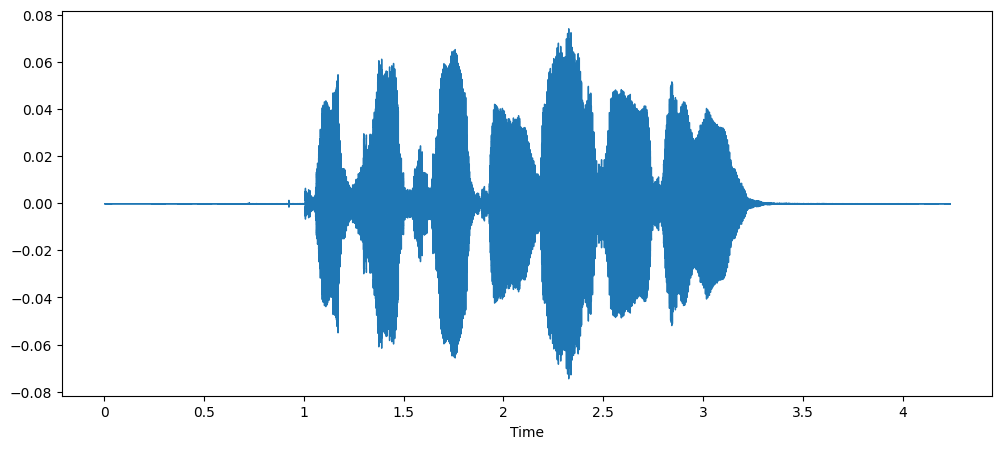

In [33]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

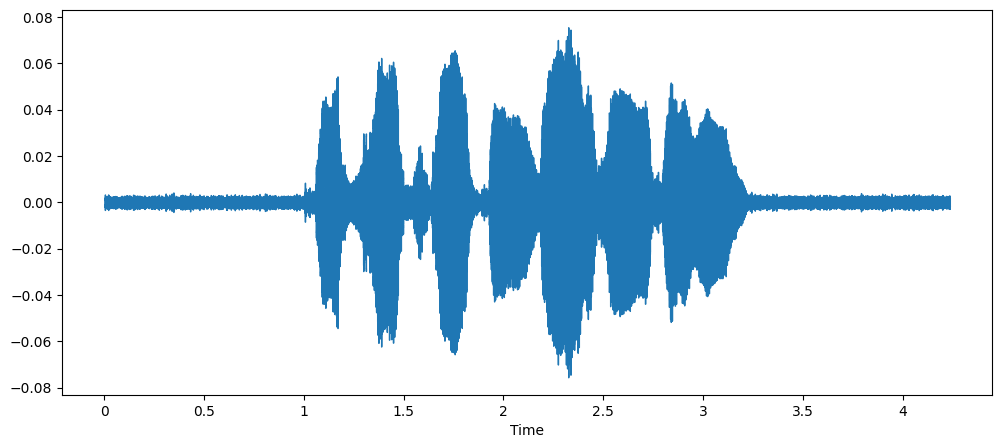

In [34]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

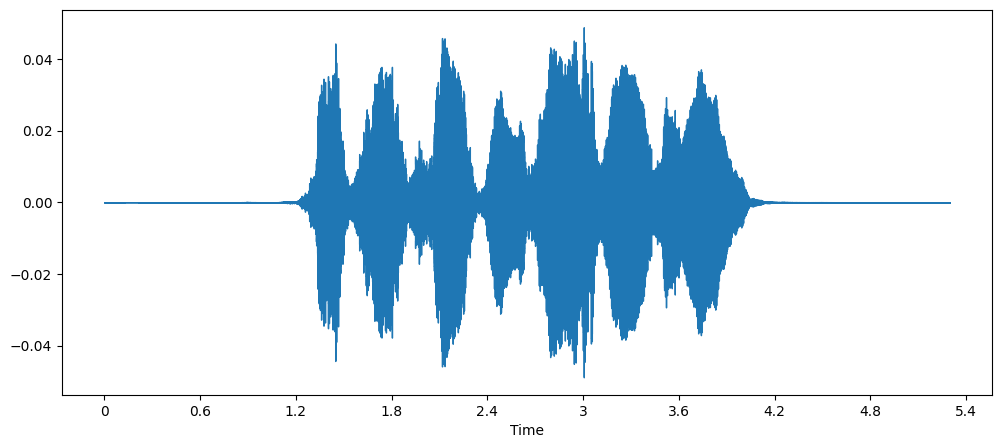

In [36]:
def stretch(data, rate=0.8):  
    return librosa.effects.time_stretch(data, rate=rate)  # Ensure rate is passed as a keyword argument  
# STRETCHED AUDIO  
x = stretch(data)  # Use the stretch function  
plt.figure(figsize=(12, 5))  
librosa.display.waveshow(y=x, sr=sr)  
ipd.Audio(x, rate=sr) 

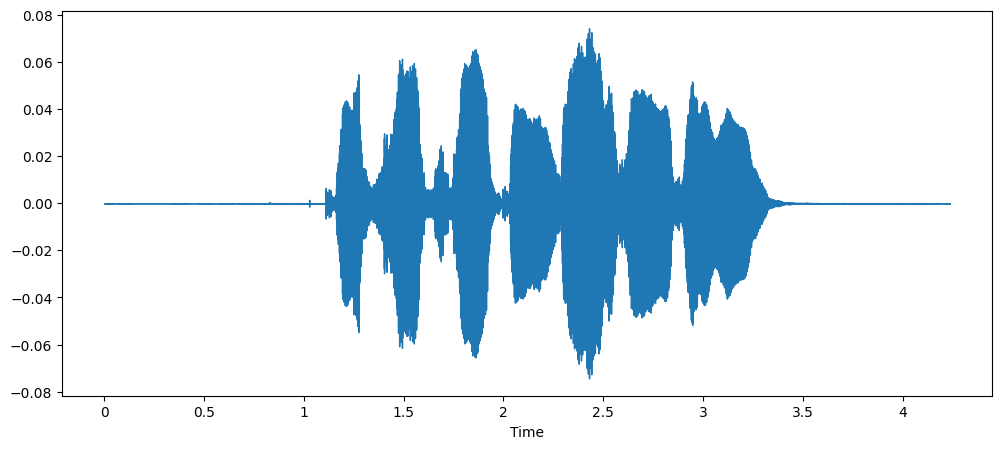

In [37]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

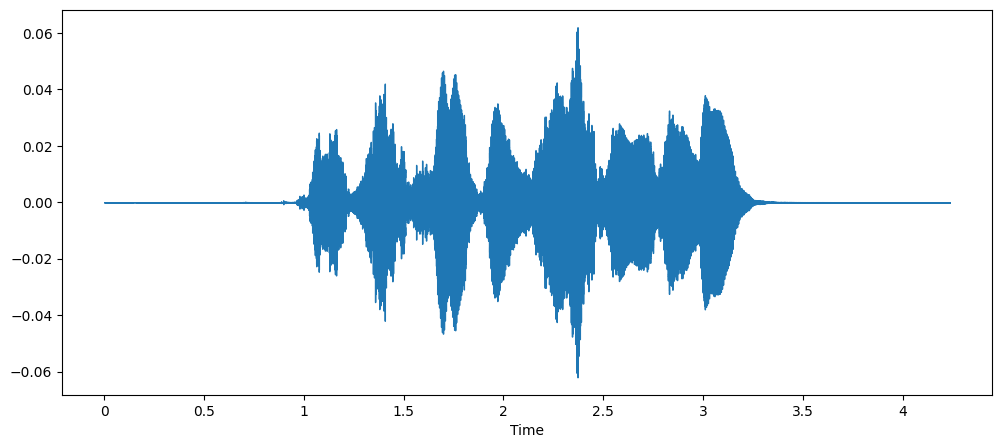

In [38]:
def pitch(data, sampling_rate, pitch_factor=0.7):  
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)  
# AUDIO WITH PITCH  
x = pitch(data, sr)  # Use the pitch function  
plt.figure(figsize=(12, 5))  
librosa.display.waveshow(y=x, sr=sr)  
ipd.Audio(x, rate=sr)  

# Feature extraction

In [39]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [41]:
# import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


# Noraml way to get features

In [42]:
def rmse(data, frame_length=2048, hop_length=512):  
    # Create an RMS array  
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  # 'y' is now the first parameter  
    return np.squeeze(rmse)  # Ensure it's in the right shape if needed


In [43]:
def mfcc(data, sr=22050, frame_length=2048, hop_length=512, flatten=True):  
    # Corrected call to librosa feature  
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T) 

In [44]:
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):  
    result = np.array([])  
    # Extract features and concatenate them  
    result = np.hstack((  
        zcr(data, frame_length, hop_length),  # Assuming you have a zero crossing rate function defined  
        rmse(data, frame_length, hop_length),  
        mfcc(data, sr, frame_length, hop_length)  # Call to corrected 'mfcc'  
    ))  
    return result  

def rmse(data, frame_length=2048, hop_length=512):  
    # Corrected call to librosa feature  
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  
    return np.squeeze(rmse)  

def mfcc(data, sr=22050, frame_length=2048, hop_length=512, flatten=True):  
    # Corrected call to librosa feature  
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)  

def get_features(path, duration=2.5, offset=0.6):  
    # Load audio data  
    data, sr = librosa.load(path, duration=duration, offset=offset)  
    # Extract features  
    aud = extract_features(data, sr)  
    return aud  

# Main processing code  
start = timeit.default_timer()  
X, Y = [], []  
for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):  
    features = get_features(path)  
    if index == 100:  
        print(f'{index} audio has been processed')  
        break  
    for i in features:  
        X.append(i)  
        Y.append(emotion)  
print('Done')  
stop = timeit.default_timer()  
print('Time: ', stop - start)

100it [00:04, 20.26it/s]

100 audio has been processed
Done
Time:  4.951673900010064


# Faster way to get features

In [45]:
len(X), len(Y), data_path.Path.shape

(237600, 237600, (1012,))

# Saving features

In [46]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,Emotions
0,0.103027,neutral
1,0.179199,neutral
2,0.259766,neutral
3,0.293457,neutral
4,0.445312,neutral


In [47]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,Emotions
0,0.103027,neutral
1,0.179199,neutral
2,0.259766,neutral
3,0.293457,neutral
4,0.445312,neutral


In [48]:
print(Emotions.isna().any())

0           False
Emotions    False
dtype: bool


In [49]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
Emotions    False
dtype: bool


(237600, 2)

In [50]:
np.sum(Emotions.isna())

0           0
Emotions    0
dtype: int64

# Data preparation

In [51]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [53]:
print(Y.shape)

(237600, 5)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((190080, 1), (190080, 5), (47520, 1), (47520, 5))

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((190080, 1), (190080, 5), (47520, 1), (47520, 5))

In [58]:
from keras.callbacks import ModelCheckpoint  

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [59]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# LSTM Model

In [64]:
# LSTM Model
model01 = Sequential()
model01.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128))
model01.add(Dense(5, activation='softmax'))  # Changer le nombre de neurones à 5
model01.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model01.summary()

#This LSTM model is well-structured to process sequential data, such as audio signals, to classify different emotions.
# The LSTM layers help capture temporal dependencies in the data, while the Dropout layers help prevent overfitting.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,125 (2.77 MB)

 Trainable params: 725,125 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Unique classes in y_train:", np.unique(Y, axis=0))

Shape of y_train: (190080, 5)
Shape of y_test: (47520, 5)
Unique classes in y_train: [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [66]:
hist=model01.fit(x_train, y_train,
                 epochs=20,
                validation_data=(x_test, y_test),batch_size=64,
                verbose=1)

Epoch 1/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 86s 24ms/step - accuracy: 0.3606 - loss: 1.5443 - val_accuracy: 0.3631 - val_loss: 1.5349
Epoch 2/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 62s 21ms/step - accuracy: 0.3640 - loss: 1.5349 - val_accuracy: 0.3632 - val_loss: 1.5353
Epoch 3/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 58s 20ms/step - accuracy: 0.3634 - loss: 1.5349 - val_accuracy: 0.3630 - val_loss: 1.5340
Epoch 4/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 58s 20ms/step - accuracy: 0.3628 - loss: 1.5347 - val_accuracy: 0.3632 - val_loss: 1.5344
Epoch 5/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 59s 20ms/step - accuracy: 0.3634 - loss: 1.5340 - val_accuracy: 0.3631 - val_loss: 1.5336
Epoch 6/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 59s 20ms/step - accuracy: 0.3636 - loss: 1.5334 - val_accuracy: 0.3631 - val_loss: 1.5328
Epoch 7/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.3624 - loss: 1.5332 - val_accuracy: 0.3630 - val_loss: 1.5325
Epoch 8/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 84s 20ms/step - accuracy: 0.3654 -

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3640 - loss: 1.5289
Accuracy of our model on test data :  36.3446980714798 %


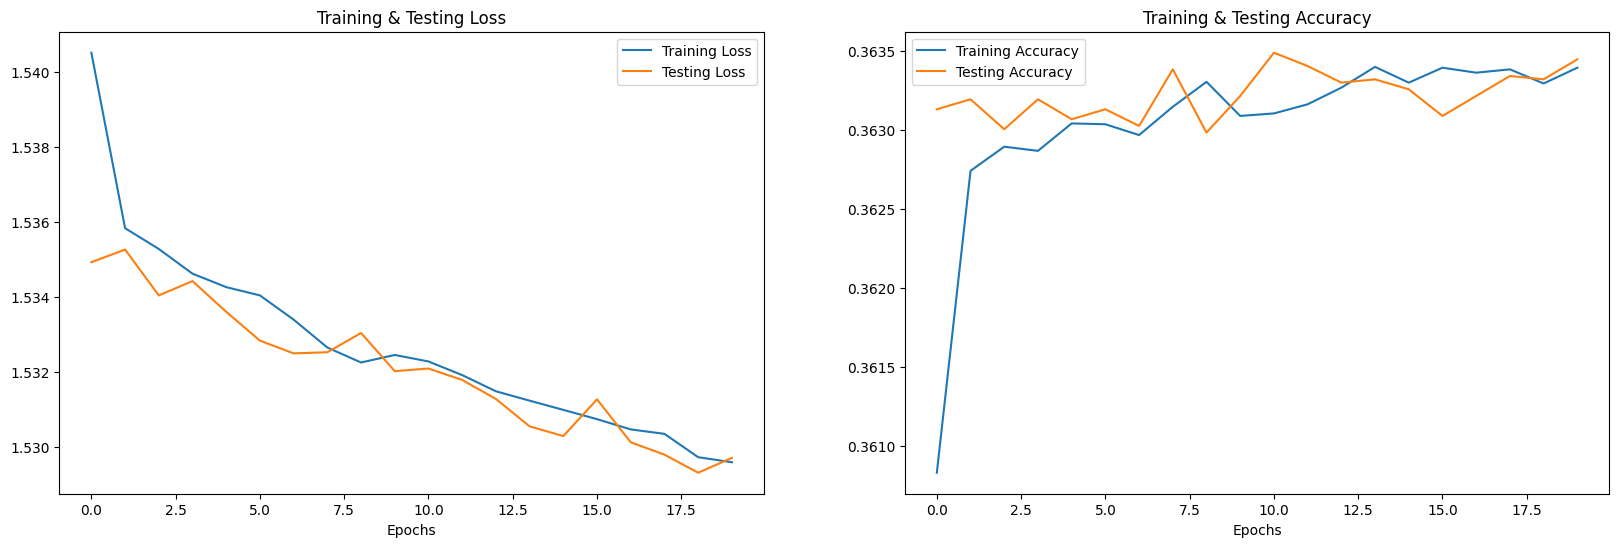

In [67]:
print("Accuracy of our model on test data : " , model01.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# CNN model

In [68]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((190080, 1, 1), (190080, 5), (47520, 1, 1), (47520, 5))

In [69]:
input_dim = 20  
num_classes = 3   

model = Sequential()  
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))  
model.add(Dense(num_classes, activation='softmax'))  


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model = tf.keras.Sequential([  
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the second max pooling layer  
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the fourth max pooling layer  
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the fifth max pooling layer  
    
    L.Flatten(),  
    L.Dense(512, activation='relu'),  
    L.BatchNormalization(),  
    L.Dense(5, activation='softmax')  
])  

# Correct metrics argument  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,56

 Total params: 2,342,533 (8.94 MB)

 Trainable params: 2,338,181 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [75]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

In [76]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)  

# Fit the model  
history = model.fit(x_traincnn, y_train, epochs=10, validation_data=(x_testcnn, y_test),   
                    batch_size=64, callbacks=[early_stop, lr_reduction, model_checkpoint])

Epoch 1/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 604s 200ms/step - accuracy: 0.3257 - loss: 1.6385 - val_accuracy: 0.3613 - val_loss: 1.5534 - learning_rate: 0.0010
Epoch 2/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 622s 209ms/step - accuracy: 0.3523 - loss: 1.5678 - val_accuracy: 0.3619 - val_loss: 1.5827 - learning_rate: 0.0010
Epoch 3/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 518s 174ms/step - accuracy: 0.3576 - loss: 1.5585 - val_accuracy: 0.3533 - val_loss: 1.5657 - learning_rate: 0.0010
Epoch 4/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 420s 141ms/step - accuracy: 0.3585 - loss: 1.5507 - val_accuracy: 0.3585 - val_loss: 1.5484 - learning_rate: 0.0010
Epoch 5/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 670s 218ms/step - accuracy: 0.3602 - loss: 1.5466 - val_accuracy: 0.3632 - val_loss: 1.5367 - learning_rate: 0.0010
Epoch 6/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 591s 199ms/step - accuracy: 0.3617 - loss: 1.5414 - val_accuracy: 0.3614 - val_loss: 1.5398 - learning_rate: 0.0010
Epoch 7/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 492s 155ms

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.3640 - loss: 1.5330
Accuracy of our model on test data :  36.319443583488464 %


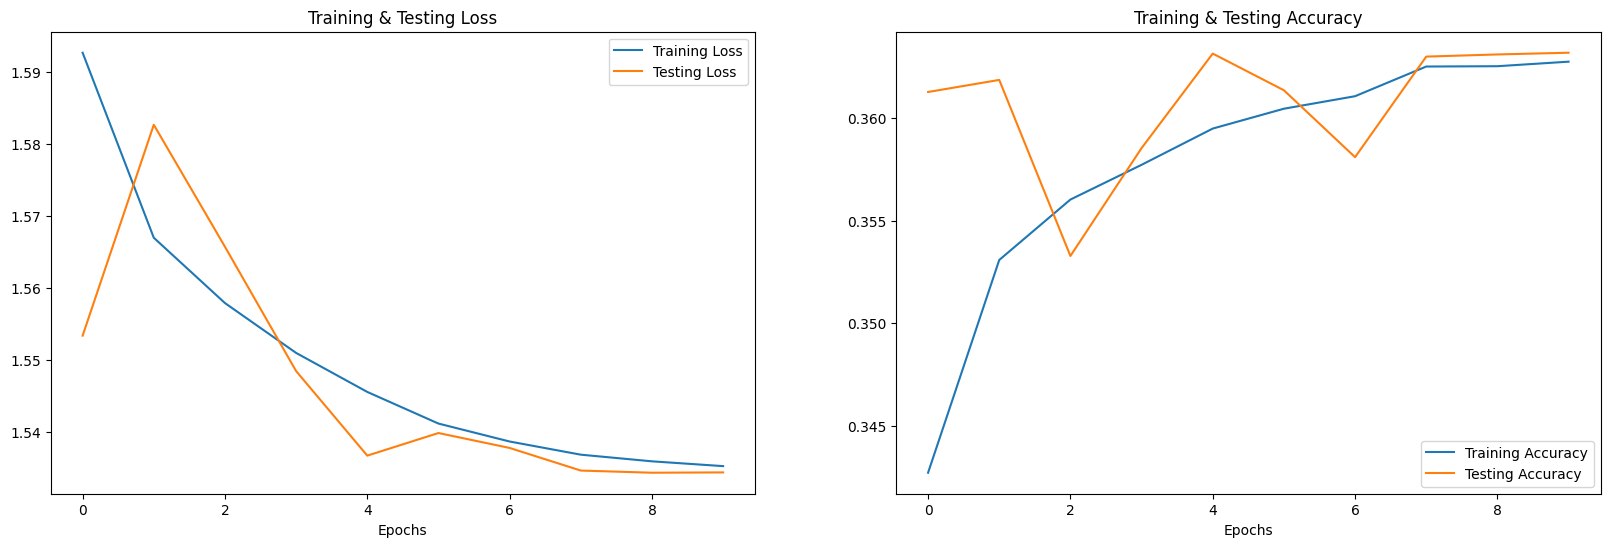

In [77]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [78]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step


,Predicted Labels,Actual Labels
0,neutral,sad
1,neutral,happy
2,neutral,fear
3,neutral,neutral
4,neutral,fear
5,neutral,fear
6,neutral,angry
7,neutral,happy
8,neutral,neutral
9,neutral,sad


# Evalutation

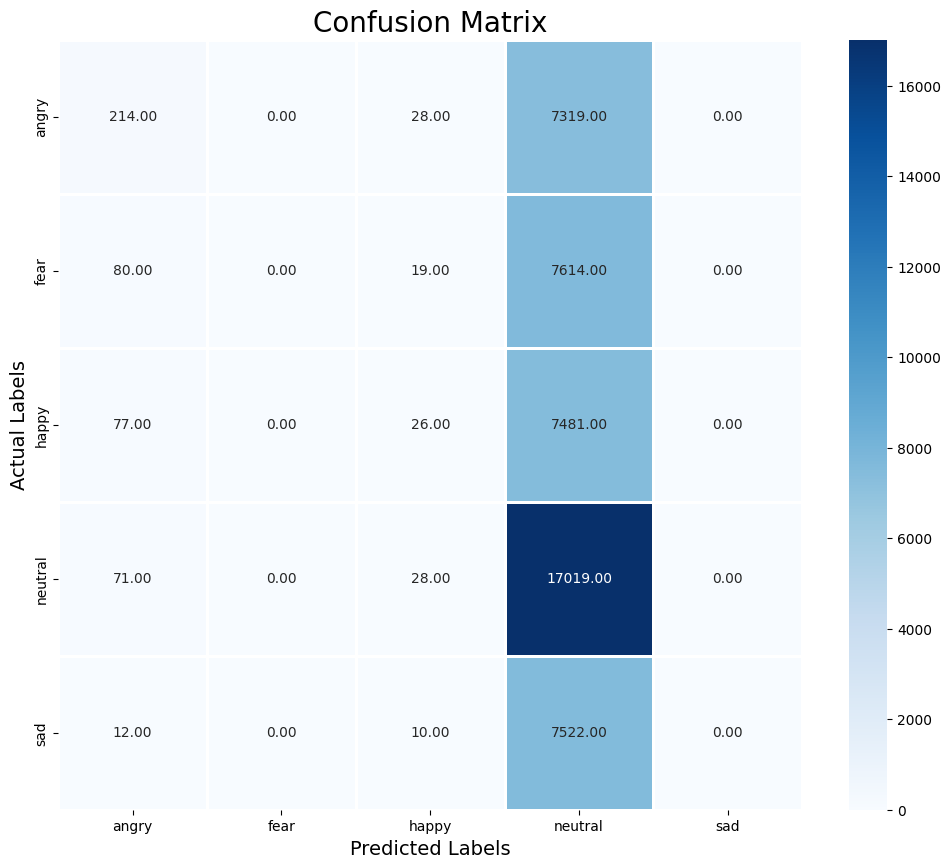

              precision    recall  f1-score   support

       angry       0.47      0.03      0.05      7561
        fear       0.00      0.00      0.00      7713
       happy       0.23      0.00      0.01      7584
     neutral       0.36      0.99      0.53     17118
         sad       0.00      0.00      0.00      7544

    accuracy                           0.36     47520
   macro avg       0.21      0.21      0.12     47520
weighted avg       0.24      0.36      0.20     47520



In [79]:
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [80]:
model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

# Serialize weights to HDF5 with the correct filename  
model.save_weights("Best_model_weights.weights.h5")  # Change made here  
print("Saved model to disk") 

Saved model to disk


In [81]:
model.summary()  

model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

model.save_weights("Best_model_weights.weights.h5")  # Corrected filename  
print("Saved model to disk")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,56

 Total params: 7,018,897 (26.77 MB)

 Trainable params: 2,338,181 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

 Optimizer params: 4,676,364 (17.84 MB)

Saved model to disk


In [82]:
json_file = open('Best_model.json', 'r')  
loaded_model_json = json_file.read()  
json_file.close()  

loaded_model = model_from_json(loaded_model_json)  
loaded_model.load_weights("Best_model_weights.weights.h5") 

In [84]:
if os.path.exists('Best_model.json'):  
    json_file = open('Best_model.json', 'r')  
    loaded_model_json = json_file.read()  
    json_file.close()  
    loaded_model = model_from_json(loaded_model_json)  
    loaded_model.load_weights("Best_model_weights.weights.h5")  # Ensure correct filename here  
    print("Loaded model from disk")  
else:  
    print("Best_model.json not found in the specified directory.")

Loaded model from disk


In [85]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3640 - loss: 1.5330
compile_metrics: 36.32%


# Saving and Loading our Standard Scaler and encoder

In [86]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")

Done


# Test script

In [104]:
print(os.listdir('Dataset_RAVDESS')) 

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_song_actors_01-24']


In [105]:
json_file = open('Best_model.json', 'r')

In [106]:
model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

model.save_weights("Best_model_weights.weights.h5")  
print("Saved model to disk") 

Saved model to disk


In [107]:
with open('Best_model.json', 'r') as json_file:  
    loaded_model_json = json_file.read()  

loaded_model = model_from_json(loaded_model_json)  
loaded_model.load_weights("Best_model_weights.weights.h5")  # Ensure the correct weights filename  
print("Loaded model from disk")

Loaded model from disk


In [108]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [109]:
def get_predict_feat(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    features = extract_features(data)
    features = np.reshape(features, newshape=(1, 2376))  # Adjust feature shape as needed
    scaled_features = scaler.transform(features)
    final_features = np.expand_dims(scaled_features, axis=2)
    
    return final_features

In [110]:
def rmse(data, frame_length=2048, hop_length=512):  
     
    rmse_result = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  
    return np.squeeze(rmse_result) 

In [111]:
features = np.reshape(features, newshape=(1, -1)) 

In [112]:
# Scale the features 
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

def get_predict_feat(path):  
    data, sr = librosa.load(path, duration=2.5, offset=0.6)  
    features = extract_features(data, sr)  
    features = np.reshape(features, newshape=(1, -1))  
    print("Extracted Features Shape:", features.shape)  
    scaled_features = scaler.transform(features)  
    return scaled_features  

In [115]:
# Function to compute Zero-Crossing Rate  
def zcr(data, frame_length=2048, hop_length=512):  
    return librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)  

# Function to compute Root Mean Square Energy  
def rmse(data, frame_length=2048, hop_length=512):  
    return librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  

# Function to compute MFCC features  
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):  
    mfcc_features = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfcc_features.T) if not flatten else np.ravel(mfcc_features.T)  

# Main feature extraction function  
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):  
    result = np.array([])  
    
    result = np.hstack((  
        result,  
        zcr(data, frame_length, hop_length).flatten(),  
        rmse(data, frame_length, hop_length).flatten(),  
        mfcc(data, sr, frame_length, hop_length)  
    ))  
    
    return result  

# Function to load audio and extract features  
def get_predict_feat(path):  
    # Load audio file  
    data, sr = librosa.load(path, duration=2.5, offset=0.6)  
    features = extract_features(data, sr)  # Extract features  
    features = np.reshape(features, newshape=(1, -1))  # Reshape to 1xN for scaling  
    print("Current Features Shape:", features.shape)  # Debugging line  
    
    return features  # Return the scaled features  

# Example usage  
if __name__ == "__main__":  
    res = get_predict_feat("Dataset_RAVDESS/Actor_01/03-02-01-01-01-01-01.wav")  
    print("Extracted Features Shape:", res.shape)

Current Features Shape: (1, 2376)
Extracted Features Shape: (1, 2376)


In [116]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    features = get_predict_feat(path1)
    predictions = loaded_model.predict(features)
    y_pred = encoder.inverse_transform(predictions)
    print("Predicted Emotion:", y_pred[0][0])

In [117]:
loaded_model.summary() 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,56

 Total params: 7,018,897 (26.77 MB)

 Trainable params: 2,338,181 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

 Optimizer params: 4,676,364 (17.84 MB)

In [118]:
features = np.reshape(features, (1, 12, 198))

In [119]:
import numpy as np  

timesteps = 12  
features_per_timestep = 2376 // timesteps  

if features.shape[1] == 2376:  
    features = np.reshape(features, (1, timesteps, features_per_timestep))  
    print("Features Shape After Reshape:", features.shape) 

    predictions = loaded_model.predict(features)  
    y_pred = encoder.inverse_transform(predictions)  
    print("Predicted Emotion:", y_pred[0][0])  
else:  
    print(f"Unexpected features shape: {features.shape}. Expected shape: (1, *, 2376).")

Unexpected features shape: (1, 12, 198). Expected shape: (1, *, 2376).


In [120]:
def prediction(path1):  
    features = get_predict_feat(path1)  
    print("Current Features Shape:", features.shape)  
    
    # Check model input shape  
    # Let's assume expected is (None, 5, 792) based on your model summary  
    expected_timesteps = 5  
    features_per_timestep = 792  # Adjust this based on your model needs  
    
    # Check if reshaping is needed based on model's input shape  
    if features.shape == (1, 2376):  
        if 2376 % expected_timesteps == 0:  
            features_per_timestep = 2376 // expected_timesteps  
            features = np.reshape(features, (1, expected_timesteps, features_per_timestep))  
            print("Reshaped Features:", features.shape)  # Check what the new shape is  
            
            # Make prediction  
            predictions = loaded_model.predict(features)  
            y_pred = encoder.inverse_transform(predictions)  
            print("Predicted Emotion:", y_pred[0][0])  
        else:  
            print("The features array cannot be evenly split into timesteps.")  
    else:  
        print("Unexpected features shape: ", features.shape)  

# Call the prediction function  
if __name__ == "__main__":  
    prediction("Dataset_RAVDESS/Actor_02/03-02-01-01-01-01-02.wav")

Current Features Shape: (1, 2376)
Current Features Shape: (1, 2376)
The features array cannot be evenly split into timesteps.


In [ ]:
import numpy as np  
import pandas as pd  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split  

# Assuming Emotions DataFrame is already available  
# Extracting X (features) and Y (emotions)  
X = Emotions.iloc[:, :-1].values  
Y = Emotions['Emotions'].values  

# One-hot encoding Y  
encoder = OneHotEncoder()  
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()  

# Train-test split with stratification  
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, random_state=42, test_size=0.2, shuffle=True, stratify=Y)  

# Flattening X for classifiers like Random Forest and SVM  
x_train_flat = x_train  
x_test_flat = x_test  

# Decoding one-hot encoded labels for classifiers  
y_train_decoded = np.argmax(y_train, axis=1)  
y_test_decoded = np.argmax(y_test, axis=1)  

# Scale features for SVM  
scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train_flat)  
x_test_scaled = scaler.transform(x_test_flat)  

# Random Forest Classifier  
def build_rf_model():  
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)  # Use fewer estimators and parallel processing  
    rf_model.fit(x_train_flat, y_train_decoded)  
    y_pred_rf = rf_model.predict(x_test_flat)  
    accuracy_rf = accuracy_score(y_test_decoded, y_pred_rf) * 100  
    return rf_model, accuracy_rf, y_pred_rf  

# SVM Classifier  
def build_svm_model():  
    svm_model = SVC(kernel='linear', C=0.1, probability=True)  # Use linear kernel for faster training  
    svm_model.fit(x_train_scaled, y_train_decoded)  
    y_pred_svm = svm_model.predict(x_test_scaled)  
    accuracy_svm = accuracy_score(y_test_decoded, y_pred_svm) * 100  
    return svm_model, accuracy_svm, y_pred_svm  

# Build and evaluate Random Forest  
rf_model, accuracy_rf, y_pred_rf = build_rf_model()  
print(f"Random Forest accuracy: {accuracy_rf}%")  
print(f"Random Forest Classification Report:\n{classification_report(y_test_decoded, y_pred_rf)}")  

# Build and evaluate SVM  
svm_model, accuracy_svm, y_pred_svm = build_svm_model()  
print(f"SVM accuracy: {accuracy_svm}%")  
print(f"SVM Classification Report:\n{classification_report(y_test_decoded, y_pred_svm)}")  

# Visual Comparison of Models  
models = ['Random Forest', 'SVM']  
accuracies = [accuracy_rf, accuracy_svm]  

plt.figure(figsize=(10, 6))  
sns.barplot(x=models, y=accuracies, palette='viridis')  
plt.title("Model Accuracy Comparison (Random Forest vs SVM)")  
plt.ylabel("Accuracy (%)")  
plt.ylim(0, 100)  
plt.show()  

# Confusion Matrix for Random Forest  
plt.figure(figsize=(8, 6))  
cm_rf = confusion_matrix(y_test_decoded, y_pred_rf)  
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])  
plt.title("Random Forest Confusion Matrix")  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.show()  

# Confusion Matrix for SVM  
plt.figure(figsize=(8, 6))  
cm_svm = confusion_matrix(y_test_decoded, y_pred_svm)  
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])  
plt.title("SVM Confusion Matrix")  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.show()

Random Forest accuracy: 25.18728956228956%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19      7603
           1       0.17      0.16      0.16      7603
           2       0.17      0.15      0.16      7604
           3       0.37      0.41      0.39     17107
           4       0.16      0.13      0.15      7603

    accuracy                           0.25     47520
   macro avg       0.21      0.21      0.21     47520
weighted avg       0.24      0.25      0.25     47520

